In [1]:
import os
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import mutagen


In [13]:

import json


flac_files = [
    f
    for f in os.listdir(
        "M:/Eksamensprojekt/1983. Now That's What I Call Music! [2018 Reissue, Remastered]/CD1"
    )
    if f.endswith(".flac")
]


with open("../tracks_info.json", "r") as f:
    tracks_info = json.load(f)

C:\Users\Benja\AppData\Local\Temp\ipykernel_23296\3496633040.py:26: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))


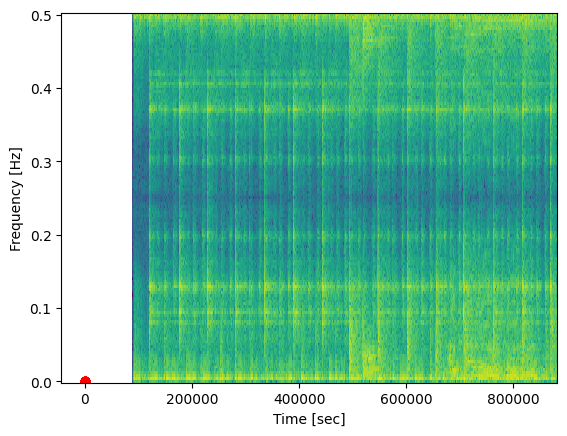

In [18]:
i = 0
file = flac_files[i]


# Load the FLAC file and slice the first 10 seconds (pydub works in milliseconds)
audio = AudioSegment.from_file(
    f"M:/Eksamensprojekt/1983. Now That's What I Call Music! [2018 Reissue, Remastered]/CD1/{file}"
)[:10000]
# Extract metadata
metadata = mutagen.File(
    f"M:/Eksamensprojekt/1983. Now That's What I Call Music! [2018 Reissue, Remastered]/CD1/{file}",
    easy=True,
)
track_name = metadata["title"][0] if "title" in metadata else "Unknown"

# Convert the audio to a numpy array
samples = np.array(audio.get_array_of_samples())

# Create a spectrogram
frequencies, times, spectrogram = signal.spectrogram(samples)

# Extract tempos from tracks_info
tempos = tracks_info[track_name]["Tempos"] if track_name in tracks_info else []

# Plot the spectrogram
plt.pcolormesh(times, frequencies, spectrogram)
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")

# Overlay the beats as red dots
for index in range(len(tempos)):
    if float(tempos[index]["tempo_inizio"]) > 10:
        break
    start_time = float(tempos[index]["tempo_inizio"])
    bpm = float(tempos[index]["tempo_bpm"])
    end_time = 10
    if index < len(tempos) - 1 and float(tempos[index + 1]["tempo_inizio"]) < 10:
        end_time = float(tempos[index + 1]["tempo_inizio"])
    beats = []
    beats = np.linspace(
        start_time, end_time, int((end_time - start_time) * bpm / 60)
    )
    plt.plot(
        beats, [0 for _ in range(len(beats))], "ro"
    )  # plot a red dot at the bpm for each time

plt.savefig(f"spectrogram_{track_name}.png")

In [4]:
audio